In [1]:
print("Hello World")

Hello World


In [3]:
import tensorflow as tf

In [10]:
# Define the paths to your dataset directories
train_dir = 'Data\MNIST\MNIST - JPG - training'
test_dir = 'Data\MNIST\MNIST - JPG - testing'

In [11]:
# Define image size and batch size
IMG_HEIGHT = 28 # Adjust if your images are different size
IMG_WIDTH = 28  # Adjust if your images are different size
BATCH_SIZE = 32

In [13]:
tf.keras.utils.image_dataset_from_directory(
    train_dir
)

Found 60000 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

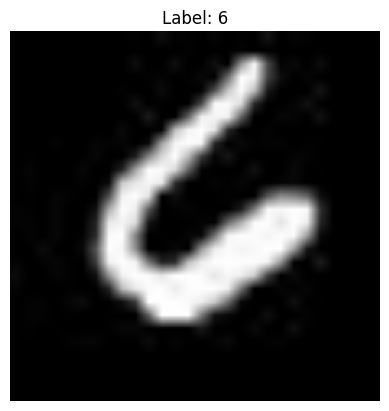

In [57]:
a = train_ds.take(1).as_numpy_iterator().next()
#label 
image  = a[0][0]
label = a[1][0]
image = image.astype('uint8')
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes
plt.title(f'Label: {label}')
plt.show()

Found 60000 files belonging to 10 classes.


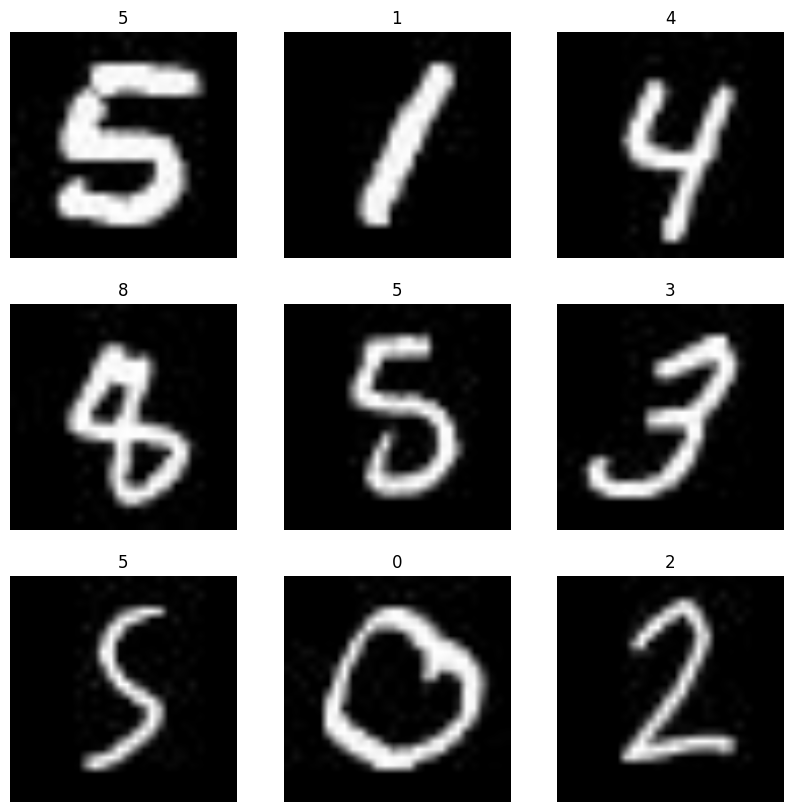

In [19]:
# Display the first batch of images and labels
import matplotlib.pyplot as plt
import numpy as np
import os

def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
)
# Get a batch of images and labels
for images, labels in train_ds.take(1):
    display_images(images, labels)


In [58]:
help(tf.keras.utils.image_dataset_from_directory)

Help on function image_dataset_from_directory in module keras.utils.image_dataset:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)
    Generates a `tf.data.Dataset` from image files in a directory.
    
    If your directory structure is:
    
    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```
    
    Then calling `image_dataset_from_directory(main_directory,
    labels='inferred')` will return a `tf.data.Dataset` that yields batches of
    images from the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).
    
    Supported image formats: jpeg

In [6]:
# Load the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',       # Infer labels from directory structure
    label_mode='int',        # Labels are integers (0-9)
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest', # Use 'nearest' for MNIST-like images
    batch_size=BATCH_SIZE,
    shuffle=True,            # Shuffle training data
    color_mode='grayscale'   # MNIST images are grayscale
)

Found 60000 files belonging to 10 classes.


In [7]:
# Load the testing dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False,           # No need to shuffle test data
    color_mode='grayscale'
)

Found 10000 files belonging to 10 classes.


In [8]:
# You can optionally print the class names found
class_names = train_dataset.class_names
print("Class names found:", class_names)

Class names found: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [14]:
# Example: Iterate over the first batch of the training dataset
for images, labels in train_dataset.take(1):
    print("Images batch shape:", images.shape)
    print("Labels batch shape:", labels.shape)

Images batch shape: (32, 28, 28, 1)
Labels batch shape: (32,)
